In [190]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/schoch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
df = pd.read_csv('twitterSentimentAnalysis/twitter_training.csv')
df.columns=['ID','Keyword','Sentiment','Tweet']
df.tail()

,ID,Keyword,Sentiment,Tweet
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Keyword    74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [70]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

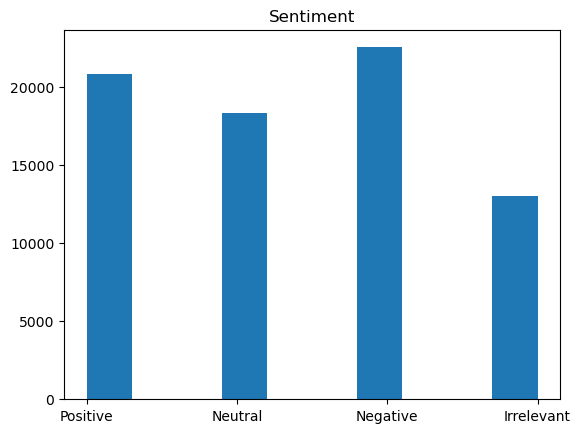

In [71]:
figure = plt.hist(df.Sentiment)
figure = plt.title('Sentiment')
plt.show()

In [72]:
# Series.str ermöglicht es auf die Werte der Series als Strings zuzugreifen und Stringoperationen anzuwenden
# lower(): Umwandlung in Kleinbuchstaben
df.Tweet = df.Tweet.str.lower()

# replace()
df.Tweet = df.Tweet.str.replace(r"https?://\S+|www\.\S+", "", regex=True) # URLs entfernen
df.Tweet = df.Tweet.str.replace(r"@\w+", "", regex=True) # @ Mentions entfernen
df.Tweet = df.Tweet.str.replace(r"[^\w\s]", "", regex=True) # alles entfernen, das nicht \w - alphanumerische Zeichen oder \s beliebiges Zeichen inkl. Tab und Space ist

In [73]:
df.tail()

,ID,Keyword,Sentiment,Tweet
74676,9200,Nvidia,Positive,just realized that the windows partition of my...
74677,9200,Nvidia,Positive,just realized that my mac window partition is ...
74678,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74679,9200,Nvidia,Positive,just realized between the windows partition of...
74680,9200,Nvidia,Positive,just like the windows partition of my mac is l...


In [74]:
df.info()
df = df.dropna() # Zeilen mit fehlenden Werten löschen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Keyword    74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Keyword    73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


## Kann bereits ein KNN Modell trainiert werden?

In [75]:
# Aufteilen des Datensatzes in Input- und Outputvariablen
X = df.Tweet # Input-Variablen: Tweet
y = df.Sentiment

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen k-NN Klassifikators
knn = KNeighborsClassifier(n_neighbors=3, metric='hamming')  # k=3 als Beispiel, Hamming-Distanz als Abstandsmetrik für qualitative Variablen
# Fehlermeldung X muss float sein
# Modelltraining
knn.fit(X_train, y_train)

# Erstellen eines Gitternetzes von Punkten zum Plotten der Entscheidungsgrenzen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Vorhersagen auf dem Gitternetz
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Erstellen der Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('k-NN Klassifikation (k=3) mit Klassengrenzen')
plt.show()


ValueError: could not convert string to float: 'i had a dream my girlfriend and i got married and rthen we had to drive home only a fuckin runaway bus and a hippie dude and there was a montage of buses blocking all 3 lanes or me racing up hills with no road just fuckin blow thru shit up like it was grand theft auto'

## Wörter

In [76]:
# str.split um einzelne Wörter zu extrahieren
# default separator: whitespace
df["words"] = df["Tweet"].str.split() 
df.head()


,ID,Keyword,Sentiment,Tweet,words
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ..."


## Wortfrequenzanalyse

In [77]:
# Alle Worte aus allen Zeilen zu einer einzigen Liste zusammenführen
word_list = np.concatenate(df["words"].values)
print("Anzahl Worte: ", len(word_list))

# Worte abzählen
word_counts = pd.Series(word_list).value_counts()
word_counts = word_counts.reset_index()
word_counts.columns = ["word", "count"]
print("|V|=", len(word_counts.word))

# Häufigste Wörter:
word_counts.head()

Anzahl Worte:  1343424
|V|= 39772


,word,count
0,the,44445
1,i,29190
2,to,28830
3,and,26590
4,a,24109


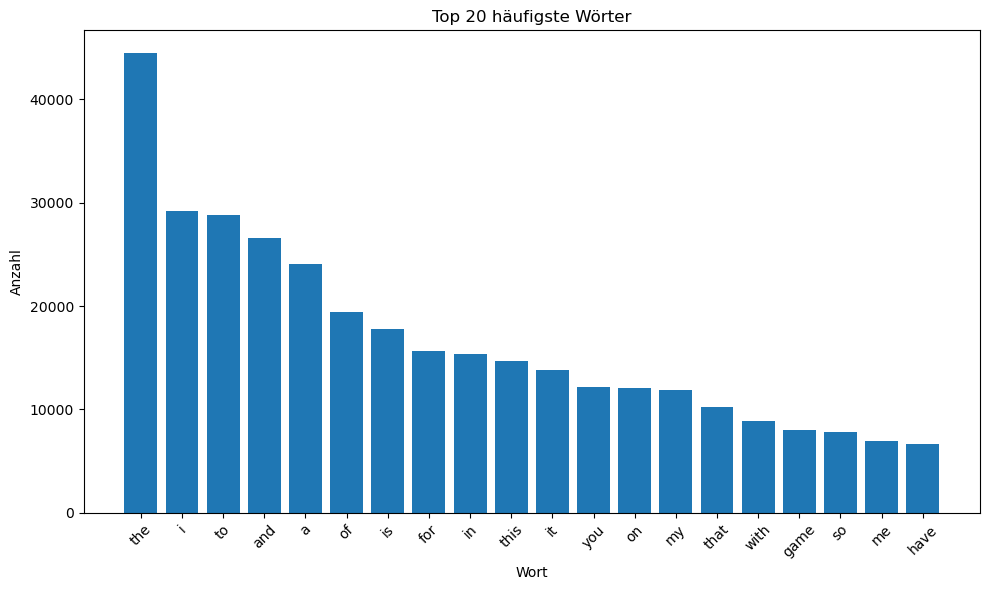

In [78]:
# Barchart Top 20 Wörter
top_n = 20
top_words = word_counts.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_words["word"], top_words["count"])
plt.title(f"Top {top_n} häufigste Wörter")
plt.xlabel("Wort")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Stop Words entfernen

In [79]:
stop_words = set(stopwords.words("english"))
print(stop_words)

pattern = r"\b(" + "|".join(stop_words) + r")\b" # regex für stop words
df.Tweet = df.Tweet.str.replace(pattern, "", regex=True) # Stopwords entfernen

df.head()


{'being', 'more', 'haven', 'couldn', 'above', 'ourselves', 'on', 'with', 'further', "that'll", 'while', 'whom', 'needn', 'through', "it'll", "we'll", 'is', 'or', 'up', 'ma', "mightn't", "mustn't", "it'd", 'doesn', 'yourselves', 'during', "we'd", "they'll", 'too', 'yours', 'before', 'this', 'just', 'weren', 'against', 't', 'are', "hadn't", 'here', 'in', 'me', 'he', "i'll", 'each', 'most', "hasn't", 'any', "should've", 'down', 'themselves', 'under', 'own', 'won', "we've", 'there', 'as', 'isn', "we're", 'shan', 'below', 'because', 'had', 'for', 'his', 'a', "won't", 'your', 'both', 'hadn', "you're", 's', 'which', 've', 'we', 'then', "he'll", "shouldn't", 'about', "aren't", 'until', 'after', 'of', 'only', 'off', 'if', "you'd", "weren't", "don't", 'such', 'same', "i'm", 'not', "they're", 'm', 'be', 'i', "wouldn't", "you've", 'the', 'her', 'from', "they'd", "he's", "she'll", 'itself', 'between', 'didn', 'she', 'should', 'but', "doesn't", 'will', "wasn't", 'have', 'were', "i've", 'o', 'our', '

,ID,Keyword,Sentiment,Tweet,words
0,2401,Borderlands,Positive,coming borders kill,"[i, am, coming, to, the, borders, and, i, will..."
1,2401,Borderlands,Positive,im getting borderlands kill,"[im, getting, on, borderlands, and, i, will, k..."
2,2401,Borderlands,Positive,im coming borderlands murder,"[im, coming, on, borderlands, and, i, will, mu..."
3,2401,Borderlands,Positive,im getting borderlands 2 murder,"[im, getting, on, borderlands, 2, and, i, will..."
4,2401,Borderlands,Positive,im getting borderlands murder,"[im, getting, into, borderlands, and, i, can, ..."


### Neue Wortfrequenzanalyse

In [80]:
# str.split um einzelne Wörter zu extrahieren
# default separator: whitespace
df["words"] = df["Tweet"].str.split() 
df.head()

,ID,Keyword,Sentiment,Tweet,words
0,2401,Borderlands,Positive,coming borders kill,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting borderlands kill,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming borderlands murder,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting borderlands 2 murder,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting borderlands murder,"[im, getting, borderlands, murder]"


Anzahl Worte:  808384
|V|= 39623


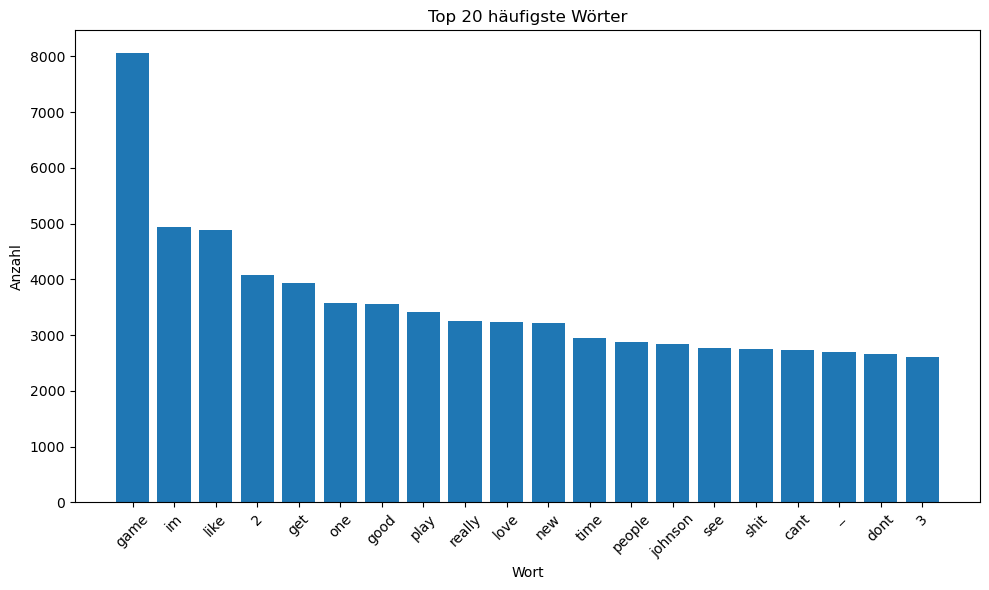

In [81]:
# Alle Worte aus allen Zeilen zu einer einzigen Liste zusammenführen
word_list = np.concatenate(df["words"].values)
print("Anzahl Worte: ", len(word_list))

# Worte abzählen
word_counts = pd.Series(word_list).value_counts()
word_counts = word_counts.reset_index()
word_counts.columns = ["word", "count"]
print("|V|=", len(word_counts.word))

# Häufigste Wörter:
word_counts.head()

# Barchart Top 20 Wörter
top_n = 20
top_words = word_counts.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_words["word"], top_words["count"])
plt.title(f"Top {top_n} häufigste Wörter")
plt.xlabel("Wort")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Byte Pair Encoding




Beispiel encoded:  ['like', 'windows', 'part', 'ition', 'm', 'ac', 'like', '6', 'years', 'behind', 'drivers', 'idea', 'didnt', 'not', 'ice']


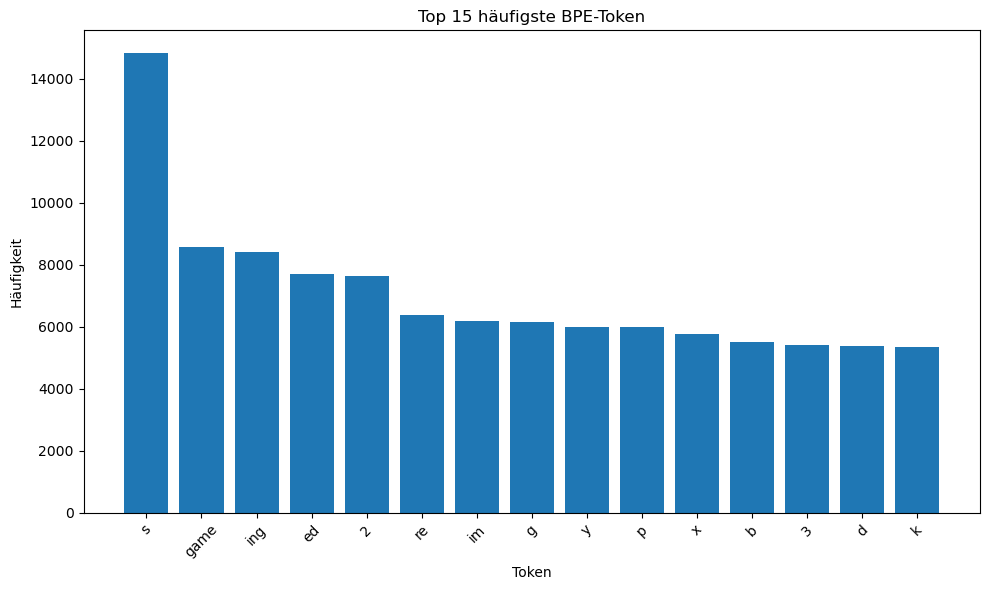

In [17]:
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace() # zunächst Trennung durch Leerzeichen
trainer = BpeTrainer(vocab_size=3000) # k=3000

# Liste mit Texten
tokenizer.train_from_iterator(df.Tweet, trainer) # tokenizer.train_from_iterator(iterator, trainer) - iteriere über die Tweets und verwende BPE als Trainer

# Text tokenisieren und Token zählen
all_tokens = []
for sentence in df.Tweet: # iteriere durch jede Zeile der Tweets, sentence1 = erste Zeile in df.Tweet
    encoded = tokenizer.encode(sentence) # Elemente des sentence werden Tokenisiert
    all_tokens.extend(encoded.tokens) # .extend() fügt Elemente an das Ende einer Liste an

print("Beispiel encoded: ", encoded.tokens)

# Häufigkeiten 
token_series = pd.Series(all_tokens) # umwandeln der Liste als Pandas Series
token_freq = token_series.value_counts()  # zählt Token
top_n = 15
top_tokens = token_freq.head(top_n)

# Barplot mit matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_tokens.index, top_tokens.values)
plt.title(f"Top {top_n} häufigste BPE-Token")
plt.xlabel("Token")
plt.ylabel("Häufigkeit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df.head()

,ID,Keyword,Sentiment,Tweet,words
0,2401,Borderlands,Positive,coming borders kill,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting borderlands kill,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming borderlands murder,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting borderlands 2 murder,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting borderlands murder,"[im, getting, borderlands, murder]"


## Vectorization

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Drei einfache Sätze
texts = [
    "I love NLP",
    "NLP is fun",
    "I love fun"
]

# BoW-Vektorisierung
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(X)


['fun' 'is' 'love' 'nlp']
  (0, 2)	1
  (0, 3)	1
  (1, 3)	1
  (1, 1)	1
  (1, 0)	1
  (2, 2)	1
  (2, 0)	1


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Drei einfache Sätze
texts = [
    "I love NLP",
    "NLP is fun",
    "I love fun"
]

# BoW-Vektorisierung
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(X)

['fun' 'love' 'nlp']
  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 0)	1
  (2, 1)	1
  (2, 0)	1


## Beispiel aus https://scikit-learn.org/stable/modules/feature_extraction.html

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Der Korpus besteheht aus 5 Dokumenten
corpus = [
    'This is the first document.', # 
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'Is this the first document document document?',
]
X = vectorizer.fit_transform(corpus) # Default: Tokenisierung von Strings mit mindestens 2 Buchstaben
# Die Auftretenshäufigkeiten eines Token pro Dokument wird direkt berechnet
X

<5x9 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [98]:
print(X)
# (x,y): Das Tupel gibt die Position in der Matrix an, z.B. Dokument 0 (Zeile 0), Token 8 - daneben steht die Auftretenshäufigkeit, hier 1 Mal
# In Dokument 4 tritt das Token 1 3 Mal auf, also das Wort document hat die Häufigkeit 3 in Dokument 4 

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1
  (4, 8)	1
  (4, 3)	1
  (4, 6)	1
  (4, 2)	1
  (4, 1)	3


In [94]:
# Die Tokenisierung kann man sich explizit ausgeben lassen, im Beispiel oben passiert das im Hintergrund
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") # Tokenisierung

['this', 'is', 'text', 'document', 'to', 'analyze']

In [95]:
# Jedes Token entspricht einer Spalte in einer Matrix
# Jede Zeile entspricht einem Dokument aus dem Korpus
# Für Jedes Dokument wird in der Zeile die Auftretenshäufigkeiten pro Token eingetragen 
print(vectorizer.get_feature_names_out())
X.toarray()

# Diese Matrix ist "sparse", dh viele Einträge sind 0
# Bei einem Korpus mit sehr vielen verschiedenen Token braucht diese Repräsentation viel Speicherplatz
# Daher Sparse Matrix in Compressed Sparse Row Format (siehe oben)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 3, 1, 1, 0, 0, 1, 0, 1]])

In [99]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [100]:
# transform um das Vokubular auf neue Dokumente anzuwenden
vectorizer.transform(['Something completely new.']).toarray() # keins der Token kommt im Vokabular vor, das gelernt wurde.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Bigram Counts

In [85]:
# Vektorisierer für Bigramme
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english') # ngram_range gibt das untere und obere ende für n-grams an
# bigram ngram_range(2,2), unigrams und bigrams ngram_range(1,2) etc., default ist ngram_range(1,1) unigrams
X = vectorizer.fit_transform(df.Tweet) # Lernen des Vokabulars aus dem Korpus, die Rückgabe ist eine Document-Term Matrix

# Feature-Namen (Bigramme) extrahieren
bigrams = vectorizer.get_feature_names_out()

# Bigram-Counts summieren
counts = X.toarray().sum(axis=0)

# Als DataFrame zur Auswertung
df_bigrams = pd.DataFrame({
    'bigram': bigrams,
    'count': counts
})

# Sortieren & Top 8 anzeigen
top_bigrams = df_bigrams.sort_values(by='count', ascending=False).head(8)
print("Top 8 Bigramme:")
print(top_bigrams.to_string(index=False))

Top 8 Bigramme:
             bigram  count
           red dead   1495
    johnson johnson   1202
    dead redemption   1185
         home depot    967
rhandlerr rhandlerr    806
    assassins creed    781
        italy italy    769
        xbox series    701


## KNN Training und Test

In [216]:
# Dokumente (Inputvariablen) und Outputvariable trennen
X = df["Tweet"] # Input
y = df["Sentiment"] # Output

# Hold-out-set: hierauf werden keine Modellentscheidungen getroffen
X_model, X_val, y_model, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

res = []

In [217]:
# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

In [218]:
## Modell 1

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer()  # ohne Stopwords und Unigrams
X_train_bow = vectorizer.fit_transform(X_train)
print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_bow, y_train) # y muss nicht unbedingt numerisch sein

# Vektorisierung der Testdaten
X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular

# Vorhersagen & Bewertung
y_pred = clf.predict(X_test_bow)

#print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("F1 Score weighted:", f1_score(y_test, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance

res.extend([['Modell 1', f1_score(y_test, y_pred, average='weighted')]])

['00' '000' '00011' ... '٩ᴗ۶' 'घरच' 'ดการออกอากาศของฉนจาก']
              precision    recall  f1-score   support

  Irrelevant       0.84      0.77      0.80      2104
    Negative       0.85      0.85      0.85      3619
     Neutral       0.78      0.81      0.80      2948
    Positive       0.81      0.84      0.83      3169

    accuracy                           0.82     11840
   macro avg       0.82      0.82      0.82     11840
weighted avg       0.82      0.82      0.82     11840

Genauigkeit: 0.8228885135135136
F1 Score weighted: 0.8228384605071994


In [219]:
## Modell 1 mit L2 Normalisierung

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer()  # mit Stopwords und Unigrams
X_train_bow = vectorizer.fit_transform(X_train)

# Normalisierung
normalizer = Normalizer(norm='l2')
X_train_bow_norm = normalizer.transform(X_train_bow)
print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_bow_norm, y_train) # y muss nicht unbedingt numerisch sein

# Vektorisierung der Testdaten
X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
X_test_bow_norm = normalizer.transform(X_test_bow)

# Vorhersagen & Bewertung
y_pred = clf.predict(X_test_bow_norm)

#print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("F1 Score weighted:", f1_score(y_test, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance

res.extend([['Modell 1 L2 Norm', f1_score(y_test, y_pred, average='weighted')]])

['00' '000' '00011' ... '٩ᴗ۶' 'घरच' 'ดการออกอากาศของฉนจาก']
              precision    recall  f1-score   support

  Irrelevant       0.94      0.86      0.90      2104
    Negative       0.89      0.91      0.90      3619
     Neutral       0.82      0.95      0.88      2948
    Positive       0.93      0.82      0.87      3169

    accuracy                           0.89     11840
   macro avg       0.89      0.88      0.89     11840
weighted avg       0.89      0.89      0.89     11840

Genauigkeit: 0.8862331081081081
F1 Score weighted: 0.886184565738784


In [220]:
## Modell 1 mit L2 Normalisierung

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer(stop_words='english')  # mit Stopwords und Unigrams
X_train_bow = vectorizer.fit_transform(X_train)

# Normalisierung
normalizer = Normalizer(norm='l2')
X_train_bow_norm = normalizer.transform(X_train_bow)
print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_bow_norm, y_train) # y muss nicht unbedingt numerisch sein

# Vektorisierung der Testdaten
X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
X_test_bow_norm = normalizer.transform(X_test_bow)

# Vorhersagen & Bewertung
y_pred = clf.predict(X_test_bow_norm)

#print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("F1 Score weighted:", f1_score(y_test, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance

res.extend([['Modell 1 L2 Norm, Stop words', f1_score(y_test, y_pred, average='weighted')]])

['00' '000' '00011' ... '٩ᴗ۶' 'घरच' 'ดการออกอากาศของฉนจาก']
              precision    recall  f1-score   support

  Irrelevant       0.92      0.85      0.89      2104
    Negative       0.89      0.90      0.90      3619
     Neutral       0.80      0.94      0.87      2948
    Positive       0.93      0.81      0.87      3169

    accuracy                           0.88     11840
   macro avg       0.89      0.88      0.88     11840
weighted avg       0.89      0.88      0.88     11840

Genauigkeit: 0.8796452702702703
F1 Score weighted: 0.8797808917307471


In [221]:
## Modell 3

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3))  # mit Stopwords und Unigrams
X_train_bow = vectorizer.fit_transform(X_train)

# Normalisierung
normalizer = Normalizer(norm='l2')
X_train_bow_norm = normalizer.transform(X_train_bow)
print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_bow_norm, y_train) # y muss nicht unbedingt numerisch sein

# Vektorisierung der Testdaten
X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
X_test_bow_norm = normalizer.transform(X_test_bow)

# Vorhersagen & Bewertung
y_pred = clf.predict(X_test_bow_norm)

#print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("F1 Score weighted:", f1_score(y_test, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance

res.extend([['Modell 3 L2 Norm, Stop words, n-gram ', f1_score(y_test, y_pred, average='weighted')]])


['00' '00 000' '00 000 british' ... 'घरच pictwittercomg26crown4e'
 'ดการออกอากาศของฉนจาก' 'ดการออกอากาศของฉนจาก unk']
              precision    recall  f1-score   support

  Irrelevant       0.93      0.79      0.86      2104
    Negative       0.81      0.84      0.82      3619
     Neutral       0.69      0.96      0.80      2948
    Positive       0.94      0.66      0.78      3169

    accuracy                           0.81     11840
   macro avg       0.84      0.81      0.82     11840
weighted avg       0.84      0.81      0.81     11840

Genauigkeit: 0.8128378378378378
F1 Score weighted: 0.8123861443512915


In [222]:
# Modell 4

# TF-IDF-Vektorisierung
vectorizer = TfidfVectorizer(stop_words='english')  # Englisch-Stopwords automatisch entfernen
X_train_bow = vectorizer.fit_transform(X_train)


# Normalisierung
normalizer = Normalizer(norm='l2')
X_train_bow_norm = normalizer.transform(X_train_bow)
print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_bow_norm, y_train) # y muss nicht unbedingt numerisch sein

# Vektorisierung der Testdaten
X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
X_test_bow_norm = normalizer.transform(X_test_bow)

# Vorhersagen & Bewertung
y_pred = clf.predict(X_test_bow_norm)

#print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("F1 Score weighted:", f1_score(y_test, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance
res.extend([['Modell TFIDF', f1_score(y_test, y_pred, average='weighted')]])

['00' '000' '00011' ... '٩ᴗ۶' 'घरच' 'ดการออกอากาศของฉนจาก']
              precision    recall  f1-score   support

  Irrelevant       0.94      0.86      0.90      2104
    Negative       0.86      0.89      0.88      3619
     Neutral       0.78      0.95      0.86      2948
    Positive       0.94      0.76      0.84      3169

    accuracy                           0.87     11840
   macro avg       0.88      0.87      0.87     11840
weighted avg       0.88      0.87      0.87     11840

Genauigkeit: 0.8664695945945946
F1 Score weighted: 0.866311150468033


In [223]:
res # Modell 1 schneidet am besten ab

[['Modell 1', 0.8228384605071994],
 ['Modell 1 L2 Norm', 0.886184565738784],
 ['Modell 1 L2 Norm, Stop words', 0.8797808917307471],
 ['Modell 3 L2 Norm, Stop words, n-gram ', 0.8123861443512915],
 ['Modell TFIDF', 0.866311150468033]]

In [225]:
# Testen von verschiedenen k 
## Modell 1

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer()  # ohne Stopwords und Unigrams
X_train_bow = vectorizer.fit_transform(X_train)

normalizer = Normalizer(norm='l2')
X_train_bow_norm = normalizer.transform(X_train_bow)

res_knn = []
# KNN Modell trainieren

for k in range(1,10,1):
    print(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_bow_norm, y_train)

    # Vektorisierung der Testdaten
    X_test_bow = vectorizer.transform(X_test) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
    X_test_bow_norm = normalizer.transform(X_test_bow)

    # Vorhersagen & Bewertung
    y_pred = clf.predict(X_test_bow)

    res_knn.extend([[k, f1_score(y_test, y_pred, average='weighted')]])

1
2
3
4
5
6
7
8
9


In [175]:
res_knn # k =1 liefert das beste Modell

[{0.8741927069891007, 1},
 {0.8373558785991901, 2},
 {0.8228384605071994, 3},
 {0.7893384140576466, 4},
 {0.7653450760739721, 5},
 {0.7370851772294479, 6},
 {0.7067369126074194, 7},
 {0.67865297223531, 8},
 {0.655830136135086, 9}]

In [226]:
# Test des Modells mit festen Parametern auf Hold-out-set
## Modell 1

# Bag-of-Words-Vektorisierung: Vokabular auf Trainingsdaten
vectorizer = CountVectorizer()  # mit Stopwords und Unigrams
X_model_bow = vectorizer.fit_transform(X_model)
normalizer = Normalizer(norm='l2')
X_model_bow_norm = normalizer.transform(X_model_bow)

print(vectorizer.get_feature_names_out())

# KNN Modell trainieren
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_model_bow_norm, y_model)

# Vektorisierung der Testdaten
X_val_bow = vectorizer.transform(X_val) # Vektorisierung der Testdaten basierend auf dem gelernten Vokabular
X_val_bow_norm = normalizer.transform(X_val_bow)

# Vorhersagen & Bewertung
y_pred = clf.predict(X_val_bow)

#print("Klassifikationsbericht:")
print(classification_report(y_val, y_pred))

print("Genauigkeit:", accuracy_score(y_val, y_pred))
print("F1 Score weighted:", f1_score(y_val, y_pred, average='weighted')) # Multiclass f1-score, mit Berücksichtigung von class imbalance

res.extend([['Modell auf Hold-out-set', f1_score(y_val, y_pred, average='weighted')]])



['00' '000' '00011' ... 'घरच' 'ดการออกอากาศของฉนจาก' 'ℐℓ٥']
              precision    recall  f1-score   support

  Irrelevant       0.96      0.91      0.94      2624
    Negative       0.96      0.93      0.95      4463
     Neutral       0.97      0.93      0.95      3589
    Positive       0.87      0.96      0.91      4123

    accuracy                           0.94     14799
   macro avg       0.94      0.93      0.94     14799
weighted avg       0.94      0.94      0.94     14799

Genauigkeit: 0.935401040610852
F1 Score weighted: 0.9358424777539442


In [227]:
# Anzeigen einiger Beispiele

for i in range(10):
    print('Documents: ', X_val.iloc[i], '; Echtes Sentiment: ', y_val.iloc[i], '; Vorhergesagtes Sentiment: ', y_pred[i])


Token:    think   hurt  ; Echtes Sentiment:  Irrelevant ; Vorhergesagtes Sentiment:  Negative
Token:    time ; Echtes Sentiment:  Positive ; Vorhergesagtes Sentiment:  Positive
Token:  calls  _ z1rv _   tweet98 got   sore ass ; Echtes Sentiment:  Neutral ; Vorhergesagtes Sentiment:  Neutral
Token:   cod black ops cold war  gonna  ass  realthunder402    dropping  ; Echtes Sentiment:  Negative ; Vorhergesagtes Sentiment:  Negative
Token:   happy   ; Echtes Sentiment:  Negative ; Vorhergesagtes Sentiment:  Positive
Token:   gave   69   herbert  75 im sick  ; Echtes Sentiment:  Negative ; Vorhergesagtes Sentiment:  Negative
Token:   yo hey    people  retweeting  tweet  regarding       part well  dota series 2 scene     know   never  eager  punish sir toby  others abusers  retweets      double standarts much mr cmon dude ; Echtes Sentiment:  Neutral ; Vorhergesagtes Sentiment:  Neutral
Token:    log   playstation   see  playstation cancel  preorder  cyberpunk 2077   reason   unacceptable ya